# ALPIDE: Instructions to use the ALPIDE telescope and analyze data

In [1]:
# load standard libraries

import numpy as np   # standard numerics library

import matplotlib
import matplotlib.pyplot as plt   # for making plots

#import time as time

#import scipy.sparse as sparse
#import scipy.sparse.linalg as sLA

#from numpy import (array, cos, sin, ones, size, sqrt, real, mod, append, arange, zeros, sum, log, nonzero,eye,round) 
# for convenience of not having to type np.xy all the time...

#from qutip import (tensor, basis) 

%matplotlib inline

## 1. Remote Access

In the following the steps for remotely accessing and testing the detectors are shown:

The easiest way to remotely access the detector is over a linux terminal. Since the ALPIDE telescope is connected to a computer at GSI, we can ssh to this computer. 

Therefore, you have to firstly login to the GSI network with your individual account via ssh. Therefore type the following in the commandline

$\color{blue}{\text{ssh -X USERNAME@lx-pool.gsi.de}}$

Afterwards you will have to enter your password. If you do so, the following will be shown:

Now you can ssh on the PC controlling the detector:

$\color{blue}{\text{ssh -X curved@alipc006 }}$

with the password T********

Now you can start to work with the detector.

## 2. Powering

If the chip is not operating, all power supplies have to be turned off and be turned on, if you want to use the detector.
$\color{red}{\text{Warning!!!}}$ Before running any command here, check again and know what you are about to turn on/off. Wrong usage of the powersupply can irreversibly damage the detectors.

From the Homedirectory ($\color{green}{\text{curved@alipc006:~$ \$ $}}$, if you are not there type $\color{blue}{\text{cd}}$) the status of the power supply can be printed by:

$\color{blue}{\text{python3 ~/eudaq2/user/ITS3/python/HMP4040.py}}$

To turn on/off channel 1 (other channels analogously), write:

$\color{blue}{\text{python3 ~/eudaq2/user/ITS3/python/HMP4040.py --off -c 1 }}$

$\color{blue}{\text{python3 ~/eudaq2/user/ITS3/python/HMP4040.py --on -c 1}}$

For doing a complete power cycle (turn off and off again), use the following command:

$\color{blue}{\text{python3 ~/eudaq2/user/ITS3/python/HMP4040.py --off -c 1 && sleep 1 && python3 ~/eudaq2/user/ITS3/python/HMP4040.py --off -c 2 && python3 ~/eudaq2/user/ITS3/python/HMP4040.py --off -c 3 && python3 ~/eudaq2/user/ITS3/python/HMP4040.py --off -c 4 && sleep 2 && python3 ~/eudaq2/user/ITS3/python/HMP4040.py --on -c 1 && sleep 1 && python3 ~/eudaq2/user/ITS3/python/HMP4040.py --on -c 2 && python3 ~/eudaq2/user/ITS3/python/HMP4040.py --on -c 3 && python3 ~/eudaq2/user/ITS3/python/HMP4040.py --on -c 4}}$

In normal operation, the Powersupply should be used in the following manner:


If the status of the power supply show other values (or not the values Bogdan agreed with you to use), contact Bogdan.

Now some more information on the managing the power of the telescope:
- If I > current limit, all channels are fused

- After turning the system on (eg: after power cycle (off and on), the DAQ+ALPIDE system will not be initialized → lowest current state (~270mA/board).
- After programming (see below): slightly higher current (~300mA/board).
- After the start of the DAQ (after ./ITS3start.sh, see below), the chip is on, clock is distributed on chip → maximum current (~450mA/board)

- 5V for powering of the DAQ boards with the current consumption stated at Info #2.
- 0 or -3V for back-bias. It should not draw current (or only slightly ~0.1 mA). If more, contact Bogdan


## 3. Programming

After the Chips and DAQ boards are powered, they can be programmed (DAQ boards require a reprogramming after each power cycle)

With

$\color{blue}{\text{alpide-daq-program -l}}$

all available DAQ boards are listed by their unique serial number. With the list you can verify that all DAQ boards (one for each sensor, usually 6) are available. If not all DAQ are shown, do a power cycle.
It might take a while for all DAQ boards to report back after repowering/reprogramming. If after the first alpide-daq-program -l not all DAQ-boards are listed, wait 10s and try again.
If this does not solve the problem, contact Bogdan.

Now, to programm the DAQ boards (both FX3 -usb- and FPGA firmware), type

$\color{blue}{\text{alpide-daq-program --all --fx3 ~/alpide-daq-software/alpidedaqboard/fx3.img --fpga ~/alpide-daq-software/alpidedaqboard/fpga-v1.0.0.bit}}$

If any problem accurs, try a power cycle. If everything works flawlessly, we are ready to take data!


## 4. Testing

But before we can take data, we have to make sure that the detector is operated properly

The first step is to get the right parameters at which we want to use the detector. Therefore two different tests are done: the threshold and the noise occupancy test. The test is executed for different internal (DACs like VCASN, ITHR) and external (Backbias voltage, referred to as BB or VBB) parameters (see more on google documentation).

After the tests are done, the data has to be read out to find the information we want (THreshold and Noise at given set of parameters)

Out of extensive research it was found that a threshold of around 100 electrons is optimal for the operation of ALPIDE. By plotting all values over their parameters, you find the dependence of the threshold from the parameters and you can determine the best sets of parameters for operation.

To execute a threshold test, execute:

... 

The data can be analyzed by:

...

For a Noiseoccupancy test, execute

## 5. Starting a measurement

To finally start a measurement, type 

$\color{blue}{\text{cd eudaq2/user/ITS3/misc/}}$

to go to the right directory.

The file $\color{green}{\text{ITS3.ini}}$ contains the mapping of planes (their number/physical ID wrt incoming beam) to DAQ serial number and more, what is needed for the data acquisition.
This file can be changed by $\color{blue}{\text{vim ITS3.ini}}$ if you want to use new config files (other arameters for VCASN and ITHR for example). The config files are also located here. They are produced by Bogdan. Take a look at them!
At line 6 of $\color{green}{\text{ITS3.ini}}$, you can specify what configs to use (“configs= ITS3-XYZ.conf”). Everything else should not be changed without consultation.

If everything is set it is left to start the data taking!

$\color{blue}{\text{./ITS3start.sh}}$

To end the run (data acquisiton will be stoped, so be carefull! Don't type it if you just want to exit from the remote computer.), type:

$\color{blue}{\text{tmux kill-session -t ITS3}}$

FOr more info, read the runcontrol chapter below.

## 6. Monitoring

### Runcontrol

If the data acquisition is started, we want to make sure that now issues accur, which could lead to bad data or no data at all!

After going back to the home directory by $\color{blue}{\text{cd}}$, type

$\color{blue}{\text{tmux a -t ITS3}}$

to open the run control. It will look like that:

# 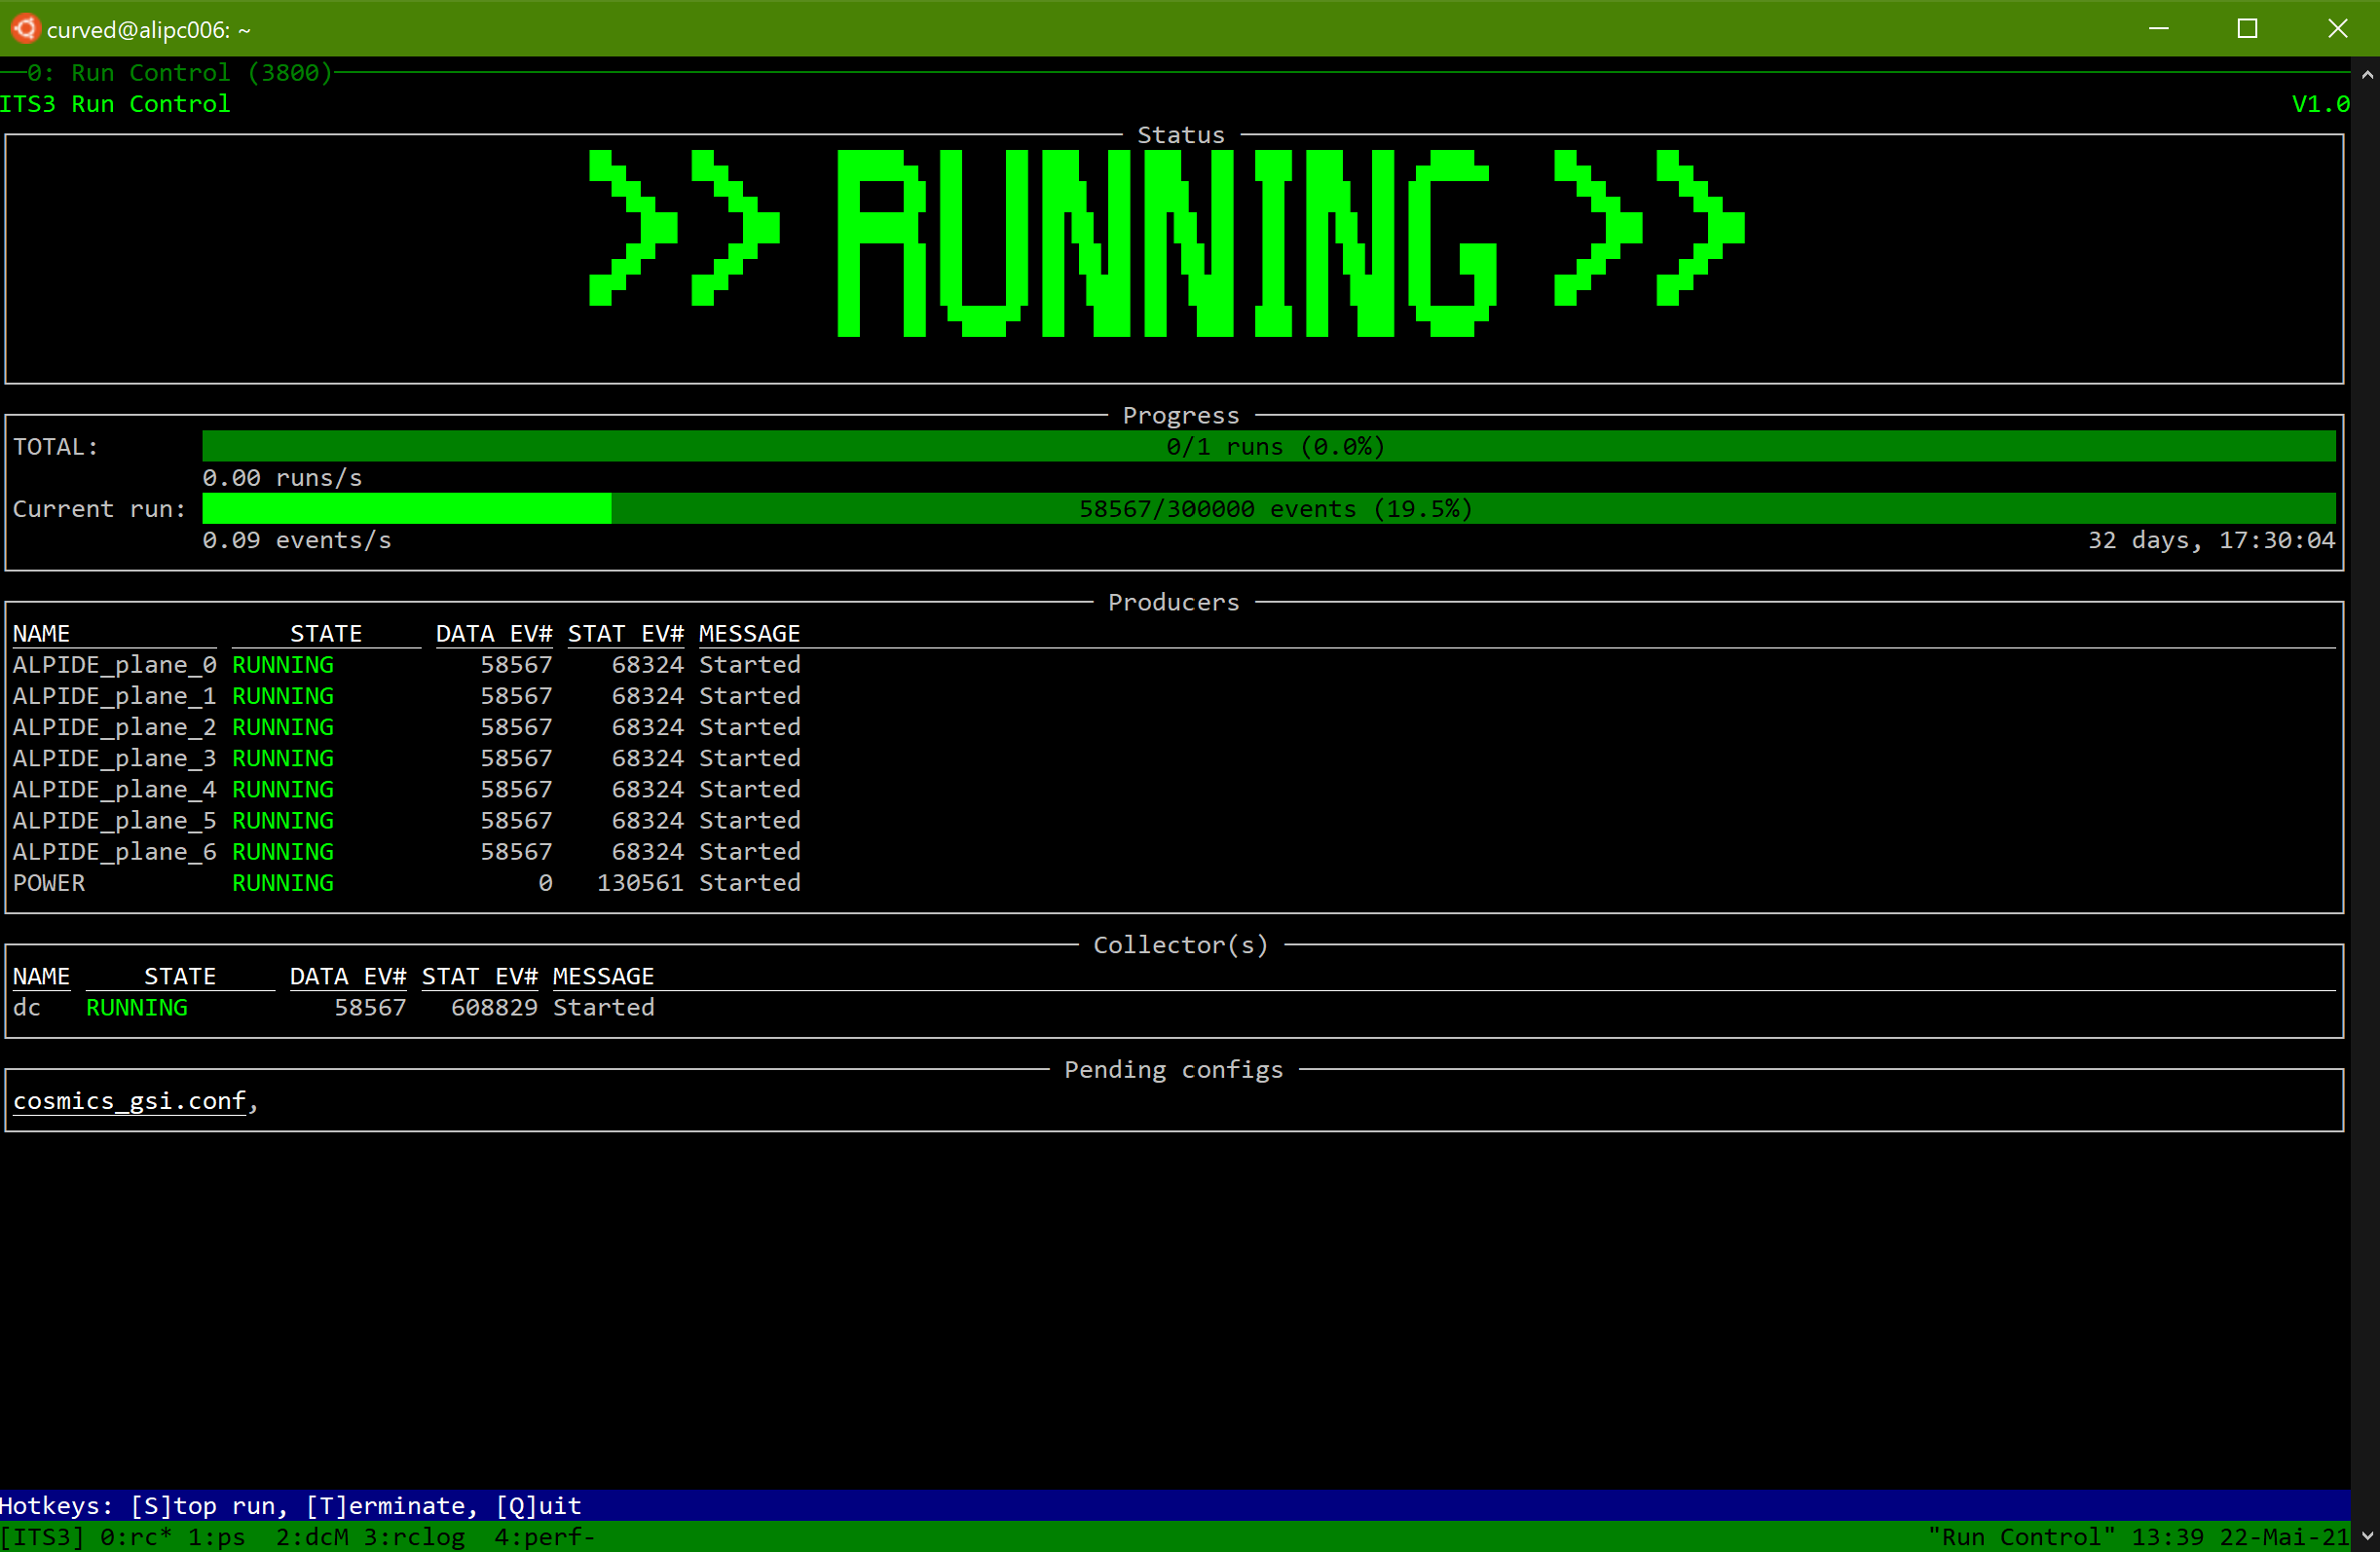

There are multiple windows in the Run control, as shown below:

0: rc - run control overview window
1: ps - producers - tmux panes for all connected producers i.e. ALPIDE planes, remote controlled power supply, temperature sensor
2: dc - data collector - terminal for eudaq2 data collector
3: rclog - run control log - errors, data and status events, etc.
4: perf - htop - load/utilization of DAQ machine

The most important one is window 0 (see image). The other windows can be used for troubleshooting. Feel free to skip through them from time to time!

Useful tmux commands:
CTRL+B – control sequence for tmux
$\color{red}{\text{CTRL+B D – detach from session}}$ (still running in background! So don't worry. To completely end the run, type $\color{blue}{\text{tmux a -t ITS3}}$)
CTRL+B N – next window
CTRL+B P – previous window
CTRL+B #NUMBER# - switch to window #NUMBER#

If the commands don't work, be sure you type them right: First press CTRL and B together, then release them. After you released them, type the additional key (D,N,P, or number). And be sure to $\color{red}{\text{not}}$ use shift or caps lock for a capital letter. They are used small.

There are some more commands, you can use via hotkeys.

Specific hotkeys for our run control (note Capital S,T,Q):
S – stop run, switches to next run if more are queued
T – terminate run
Q – kill GUI

See also: https://tmuxcheatsheet.com/


### Eventmonitor

Another way to check, wether the collected data is reasonable, one can look at the hitmaps and correlations between the sensors. To do so, type from teh homedirectory:

$\color{blue}{\text{cd ../../media/curved/ALPIDE_data/GSI_May_2021/}}$

and by typing $\color{blue}{\text{ls -lrt}}$ you can look at the data files. The current run is the latest and should be located at the bottom of the list. Copy the file name, for example $\color{green}{\text{run195150617_210514150623.raw}}$ and type:

$\color{blue}{\text{~/eudaq2/bin/StdEventMonitor -d run195150617_210514150623.raw -e 10}}$

In the Eventmonitor, you can look at different plots, like the pixel hitmaps, cluster hitmaps, or the correlation between the the x/y coordinates of different sensors. The latter is shown in the following:

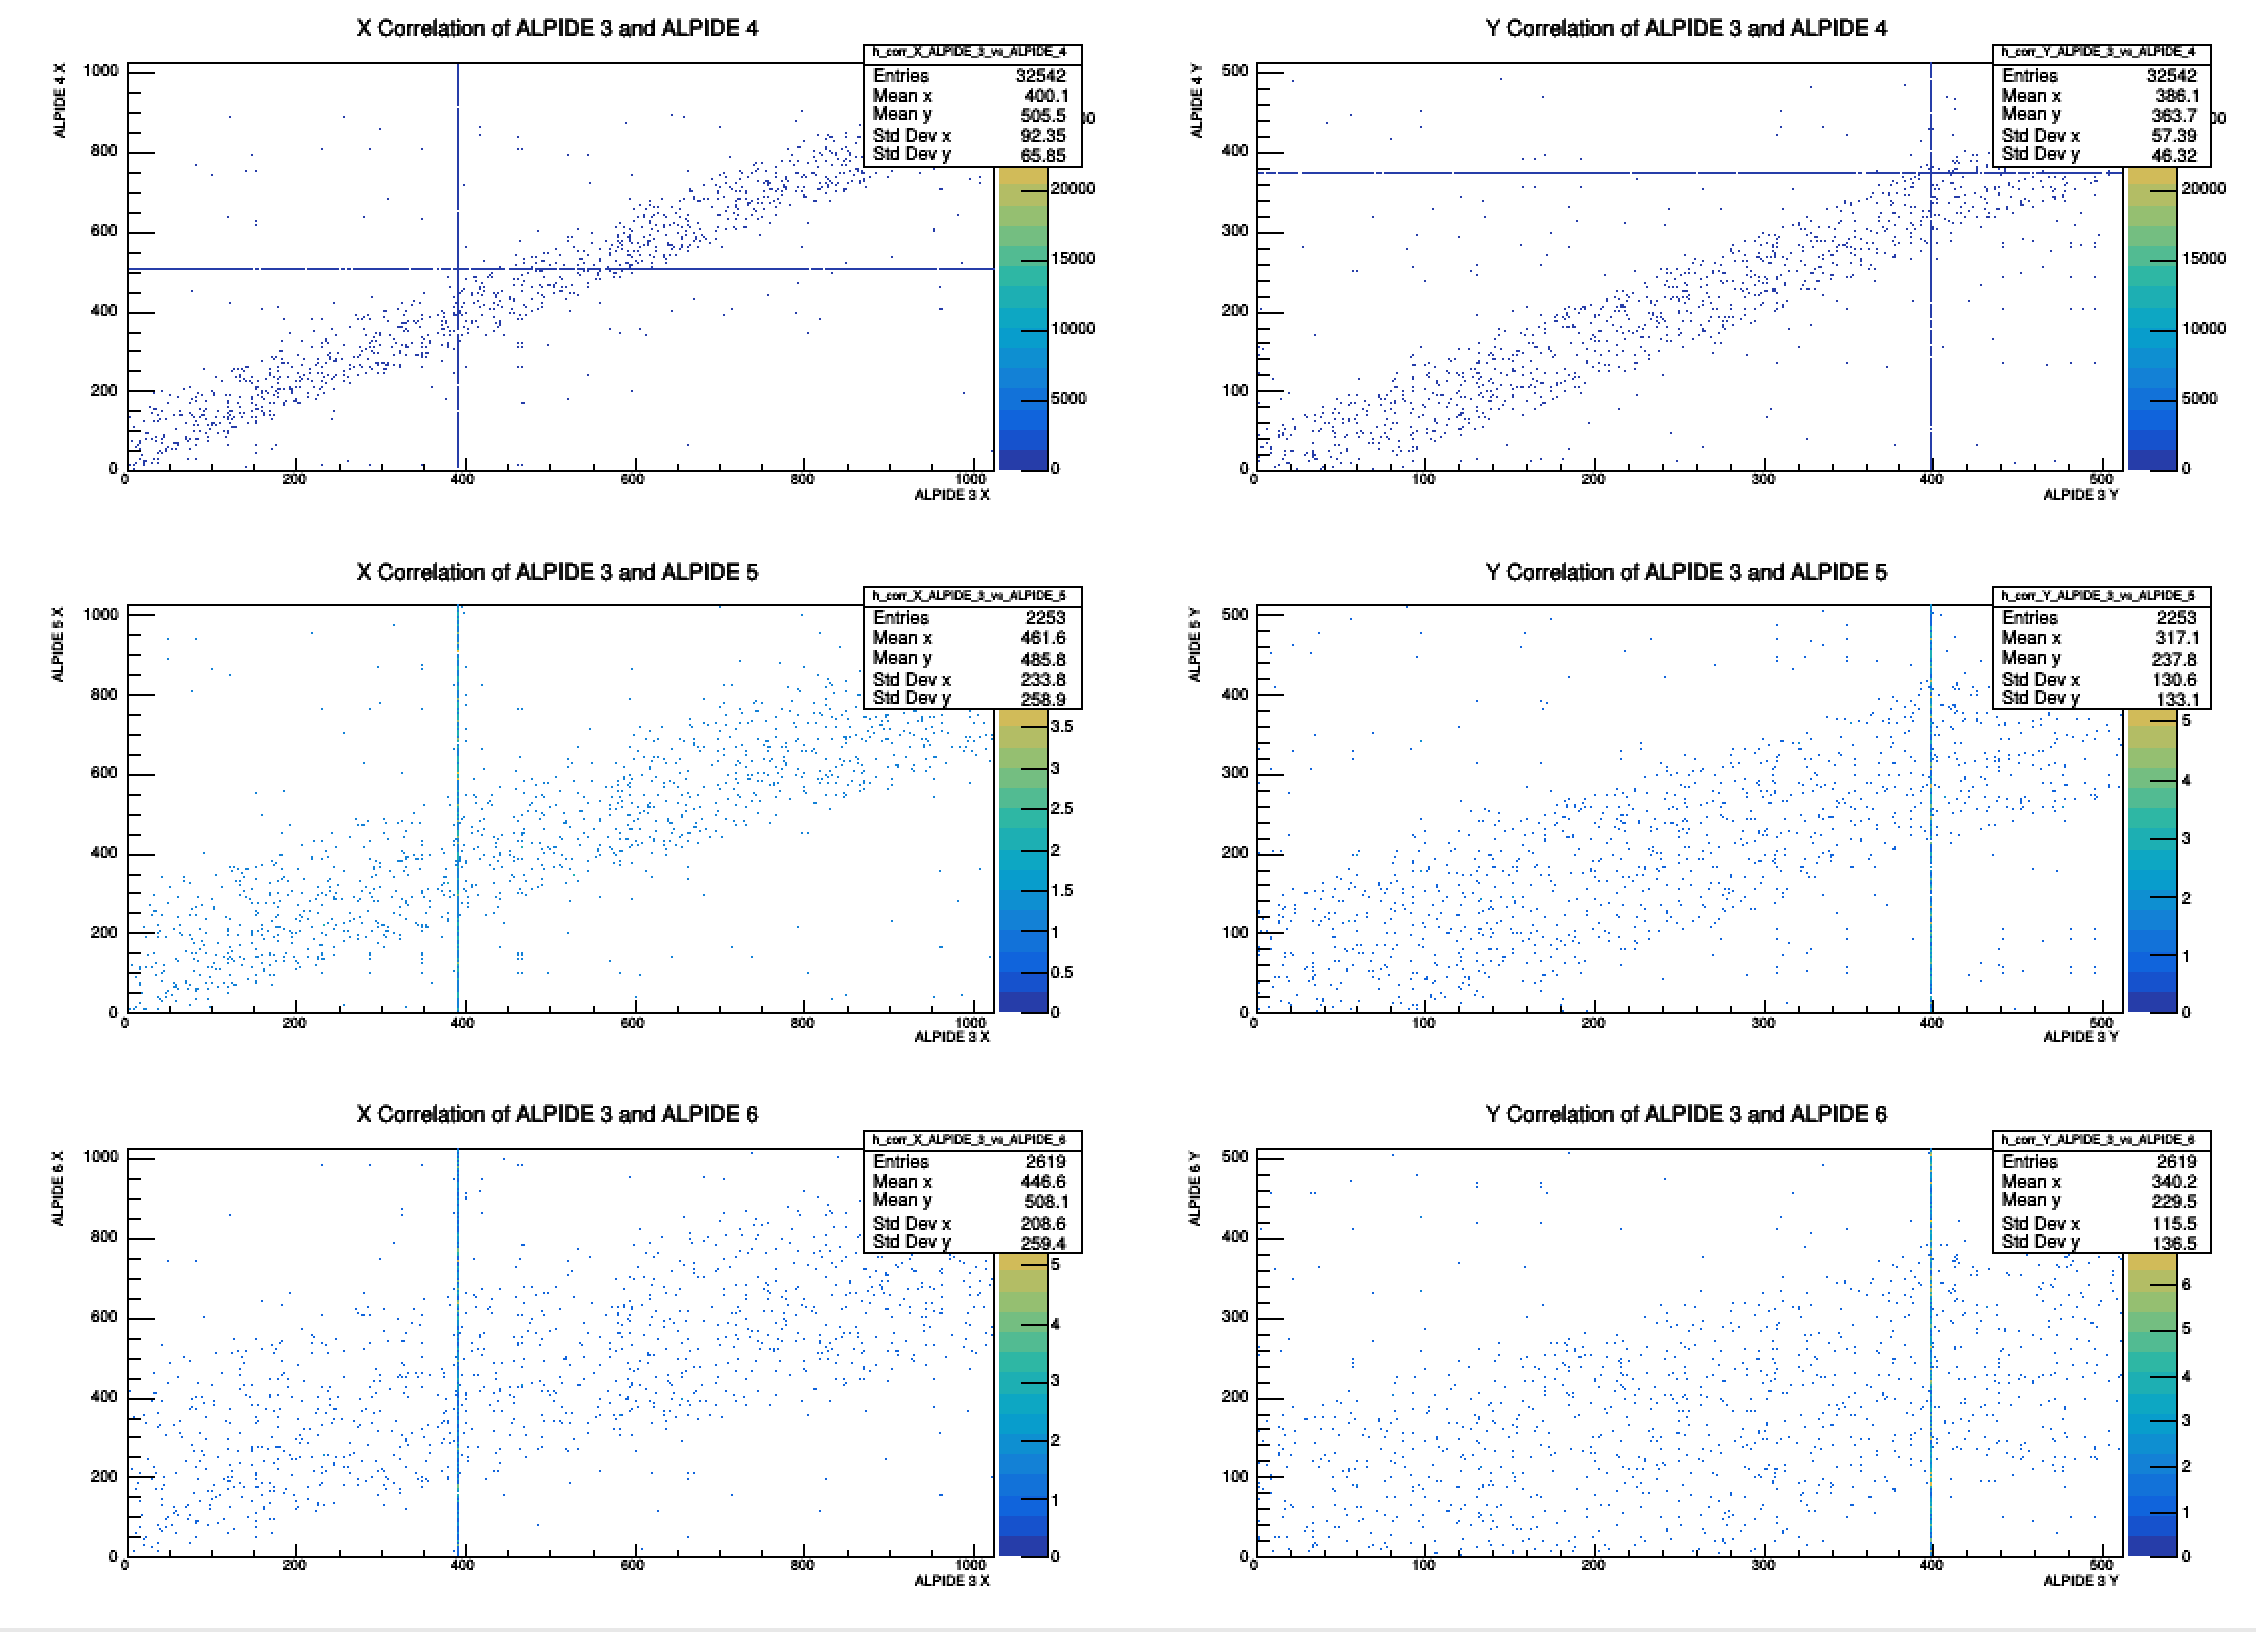

Can you explain, why this is the expected shape for a setup with a triggering scintillator below the bottom plane (plane 6)? Which parts of the plot are unwanted effects, which appear (most probably) do to progressed radiation damage?

Feel free to look through the plots!